A. BINARY LABELED DATA

VÍ DỤ A1:


In [71]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(12)
means = [[0, 3], [2, 0]]
cov1 = [[1, 0.3], [0.3, 1]]
cov2 = [[1, 0.2], [0.2, 1.5]]
N1 = 50
N2 = 40
N = N1 + N2

X1 = np.random.multivariate_normal(means[0], cov1, N1)  
X2 = np.random.multivariate_normal(means[1], cov2, N2)

X = np.vstack((X1, X2))
y = np.hstack((np.ones(50), 2*np.ones(40)))


Number of samples in Class 1: 50
Number of samples in Class 2: 40
Mean of Class 1: [0.2041 3.0467]
Mean of Class 2: [ 1.8048 -0.1825]


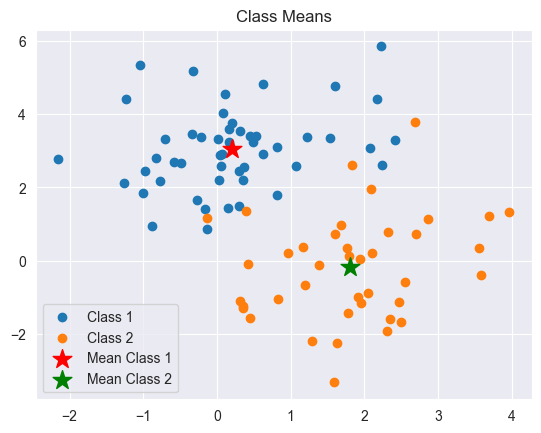

In [72]:

class1 = X[y == 1]
class2 = X[y == 2]
print("Number of samples in Class 1:", class1.shape[0])
print("Number of samples in Class 2:", class2.shape[0])

mean1 = np.mean(class1, axis=0)
mean2 = np.mean(class2, axis=0)
print("Mean of Class 1:", mean1)
print("Mean of Class 2:", mean2)

plt.scatter(class1[:, 0], class1[:, 1], label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], label='Class 2')
plt.scatter(mean1[0], mean1[1], color='red', s=200, marker='*', label='Mean Class 1')
plt.scatter(mean2[0], mean2[1], color='green', s=200, marker='*', label='Mean Class 2')
plt.legend()
plt.title('Class Means')
plt.show()


In [73]:
m1 = np.mean(X1.T, axis = 1, keepdims = True)
m2 = np.mean(X2.T, axis = 1, keepdims = True)
a = (m1 - m2)
S_B = a.dot(a.T)

SW1 = X1.T - np.tile(m1, (1, N1))
SW2 = X2.T - np.tile(m2, (1, N2))
S_W = SW1.dot(SW1.T) + SW2.dot(SW2.T)
print('Between-class covariance matrix: S_B =\n', S_B)
print('Within-class covariance matrix: S_W =\n',S_W)

Between-class covariance matrix: S_B =
 [[ 2.5621 -5.1688]
 [-5.1688 10.4275]]
Within-class covariance matrix: S_W =
 [[ 86.8364  27.5178]
 [ 27.5178 140.24  ]]


In [74]:
from numpy import argmax

L, W = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
Id = argmax(L)  
w = W[:, Id]    
print(w)
print(w.shape)


[ 0.6947 -0.7193]
(2,)


(50,) (2,)
(2, 50) (2, 40)


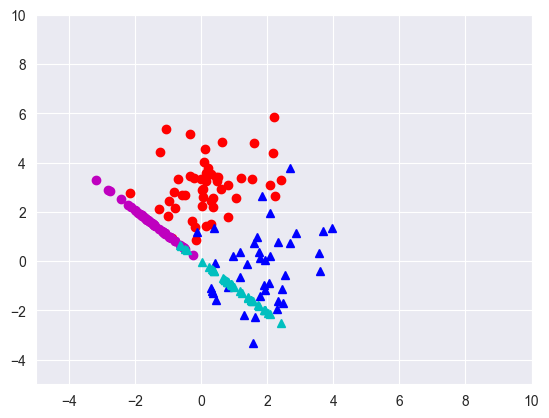

In [75]:
plt.plot(X1[:, 0], X1[:, 1], 'ro')
plt.plot(X2[:, 0], X2[:, 1], 'b^')
plt.axis([-5, 10, -5, 10])
norm_W = w.T.dot(w)
X1_tmp = X1.dot(w)/norm_W
X2_tmp = X2.dot(w)/norm_W
print(X1_tmp.shape, w.shape)
X1_p = np.multiply(w.reshape(2,1), X1_tmp.T)
X2_p = np.multiply(w.reshape(2,1), X2_tmp.T)
print(X1_p.shape,X2_p.shape)
plt.plot(X1_p[0, :], X1_p[1, :], 'mo')
plt.plot(X2_p[0, :], X2_p[1, :], 'c^')
plt.show()

VÍ DỤ A.2(BÀI THỰC HÀNH 1)

In [119]:
import pandas as pd
import numpy as np
df = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab7/pd_speech_features.csv")
print(df.columns[:10])
X = df.drop(columns=['class', 'id'], errors='ignore').values  
y = df['class'].values
print("Kích thước dữ liệu:", X.shape, "→ Số mẫu:", X.shape[0], " Số thuộc tính:", X.shape[1])


Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter'],
      dtype='object')
Kích thước dữ liệu: (756, 753) → Số mẫu: 756  Số thuộc tính: 753


In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=500, random_state=42, stratify=y
)

In [121]:
classes = np.unique(y_train)
mean_vectors = []
for c in classes:
    mean_vectors.append(np.mean(X_train[y_train == c], axis=0))
mean_vectors = np.array(mean_vectors)

S_W = np.zeros((X_train.shape[1], X_train.shape[1]))
for c, mv in zip(classes, mean_vectors):
    class_scatter = np.zeros((X_train.shape[1], X_train.shape[1]))
    for x in X_train[y_train == c]:
        x, mv = x.reshape(-1,1), mv.reshape(-1,1)
        class_scatter += (x - mv).dot((x - mv).T)
    S_W += class_scatter
overall_mean = np.mean(X_train, axis=0).reshape(-1,1)
S_B = np.zeros((X_train.shape[1], X_train.shape[1]))
for c, mv in zip(classes, mean_vectors):
    n = X_train[y_train == c, :].shape[0]
    mv = mv.reshape(-1,1)
    S_B += n * (mv - overall_mean).dot((mv - overall_mean).T)
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
idx = np.argmax(eig_vals.real)
w = eig_vecs[:, idx].real

X_train_lda = X_train.dot(w)
X_test_lda = X_test.dot(w)
print("Dữ liệu sau LDA:", X_train_lda.shape)

Dữ liệu sau LDA: (500,)


In [122]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("Dữ liệu sau PCA:", X_train_pca.shape)


Dữ liệu sau PCA: (500, 2)


In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# --- LDA ---
clf_lda = LogisticRegression()
clf_lda.fit(X_train_lda.reshape(-1,1), y_train)
y_pred_lda = clf_lda.predict(X_test_lda.reshape(-1,1))
acc_lda = accuracy_score(y_test, y_pred_lda)

# --- PCA ---
clf_pca = LogisticRegression()
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print(f" Độ chính xác Logistic Regression (LDA - 1D): {acc_lda:.4f}")
print(f" Độ chính xác Logistic Regression (PCA - 2D): {acc_pca:.4f}")


 Độ chính xác Logistic Regression (LDA - 1D): 0.7461
 Độ chính xác Logistic Regression (PCA - 2D): 0.6680


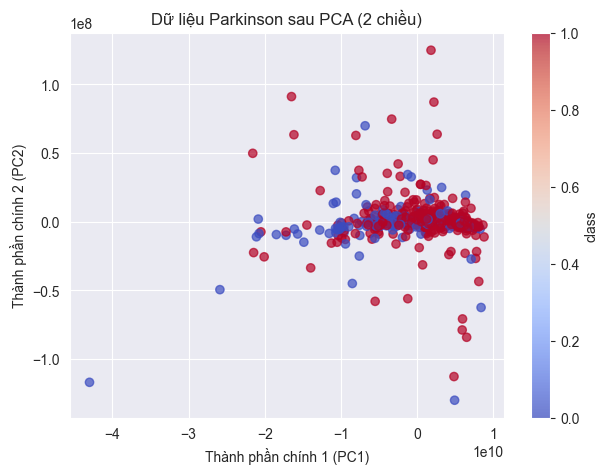

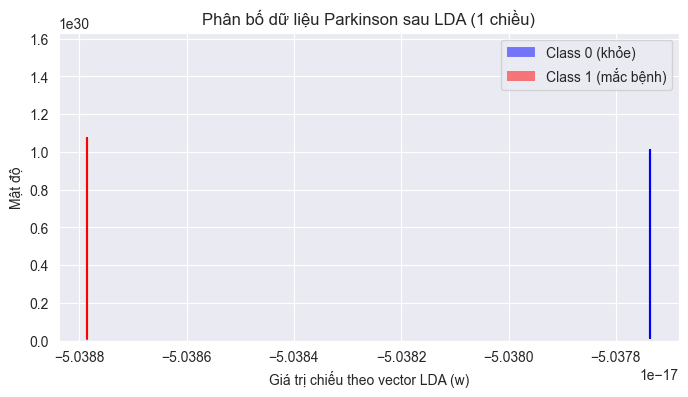

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Vẽ dữ liệu PCA (2D)
plt.figure(figsize=(7,5))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train, cmap = 'coolwarm', alpha=0.7)
plt.title("Dữ liệu Parkinson sau PCA (2 chiều)")
plt.xlabel("Thành phần chính 1 (PC1)")
plt.ylabel("Thành phần chính 2 (PC2)")
plt.colorbar(label='class')
plt.show()

#Vẽ dữ liệu LDA (1D) 
plt.figure(figsize=(8,4))
sns.histplot(X_train_lda[y_train==0], color='blue', label='Class 0 (khỏe)', kde=True, stat='density', bins=30, alpha=0.5)
sns.histplot(X_train_lda[y_train==1], color='red', label='Class 1 (mắc bệnh)', kde=True, stat='density', bins=30, alpha=0.5)
plt.title("Phân bố dữ liệu Parkinson sau LDA (1 chiều)")
plt.xlabel("Giá trị chiếu theo vector LDA (w)")
plt.ylabel("Mật độ")
plt.legend()
plt.show()


HUẤN LUYỆN VÀ ĐÁNH GIÁ MÔ HÌNH TRÊN DỮ LIỆU GỐC

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Chia dữ liệu 3:1
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/4, random_state=42, stratify=y
)

#Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

#Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

print(f"Độ chính xác Naive Bayes (dữ liệu gốc): {acc_nb:.4f}")
print(f"Độ chính xác Logistic Regression (dữ liệu gốc): {acc_lr:.4f}")


Độ chính xác Naive Bayes (dữ liệu gốc): 0.7566
Độ chính xác Logistic Regression (dữ liệu gốc): 0.7672


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Huấn luyện và đánh giá trên dữ liệu đã giảm chiều (PCA hoặc LDA từ ý 1)

In [127]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu gốc (3:1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/4, random_state=42, stratify=y
)


Giảm chiều với PCA và LDA (từ tập train/test ở trên)

In [128]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#PCA 2 chiều
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#LDA 1 chiều
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


Áp dụng các mô hình phân loại

In [129]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Naive Bayes (gốc)
nb = GaussianNB().fit(X_train, y_train)
acc_nb = accuracy_score(y_test, nb.predict(X_test))

# Logistic Regression (gốc)
lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
acc_lr = accuracy_score(y_test, lr.predict(X_test))

# Naive Bayes (PCA)
nb_pca = GaussianNB().fit(X_train_pca, y_train)
acc_nb_pca = accuracy_score(y_test, nb_pca.predict(X_test_pca))


# Logistic Regression (PCA)
lr_pca = LogisticRegression(max_iter=1000).fit(X_train_pca, y_train)
acc_lr_pca = accuracy_score(y_test, lr_pca.predict(X_test_pca))

# Naive Bayes (LDA)
nb_lda = GaussianNB().fit(X_train_lda, y_train)
acc_nb_lda = accuracy_score(y_test, nb_lda.predict(X_test_lda))

# Logistic Regression (LDA)
lr_lda = LogisticRegression().fit(X_train_lda, y_train)
acc_lr_lda = accuracy_score(y_test, lr_lda.predict(X_test_lda))


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [130]:
print("===== Kết quả phân loại =====")
print(f"Naive Bayes (dữ liệu gốc): {acc_nb:.4f}")
print(f"Naive Bayes (PCA - 2D):    {acc_nb_pca:.4f}")
print(f"Naive Bayes (LDA - 1D):    {acc_nb_lda:.4f}")
print()
print(f"Logistic Regression (dữ liệu gốc): {acc_lr:.4f}")
print(f"Logistic Regression (PCA - 2D):    {acc_lr_pca:.4f}")
print(f"Logistic Regression (LDA - 1D):    {acc_lr_lda:.4f}")


===== Kết quả phân loại =====
Naive Bayes (dữ liệu gốc): 0.7566
Naive Bayes (PCA - 2D):    0.7566
Naive Bayes (LDA - 1D):    0.7196

Logistic Regression (dữ liệu gốc): 0.7672
Logistic Regression (PCA - 2D):    0.6772
Logistic Regression (LDA - 1D):    0.7196


B. LDA FOR MULTINOMIAL DATA

Ví dụ B.1.

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
label_dict = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}

In [132]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target  

np.set_printoptions(precision = 4)
mean_vectors = []

for cl in range(0, 3):
    mean_vectors.append(np.mean(X[y == cl], axis=0))
    print('Mean vector of class', cl+1, mean_vectors[cl], '.T')


Mean vector of class 1 [5.006 3.428 1.462 0.246] .T
Mean vector of class 2 [5.936 2.77  4.26  1.326] .T
Mean vector of class 3 [6.588 2.974 5.552 2.026] .T


In [133]:
S_W = np.zeros((4,4))
for cl, mv in zip(range(0, 3), mean_vectors):
    class_sc_mat = np.zeros((4,4))
    for row in X[y == cl]:
        row = row.reshape(4, 1)
        mv = mv.reshape(4, 1)
        class_sc_mat += (row - mv).dot((row -mv).T)
    S_W += class_sc_mat
print(S_W)

[[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]


In [134]:
overall_mean = np.mean(X, axis = 0)
#initialize zeros mnatrix
S_B = np.zeros((4,4))
#For every iteration in the mean vectors
for cl,mean_vec in enumerate(mean_vectors):
    #Extracting the number of samples per class, in this case, 50
    n = X[y==cl,:].shape[0]
    #Reshaping matrices from 1x4 to 4x1 for better manipulation
    mean_vec = mean_vec.reshape(4,1)
    overall_mean = overall_mean.reshape(4,1)
    #Applying the equation
    S_B += n * (mean_vec - overall_mean) .dot((mean_vec - overall_mean).T)
print(S_B)

[[ 63.2121 -19.9527 165.2484  71.2793]
 [-19.9527  11.3449 -57.2396 -22.9327]
 [165.2484 -57.2396 437.1028 186.774 ]
 [ 71.2793 -22.9327 186.774   80.4133]]


In [135]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
for i in range(len(eigenvalues)):
    eigenvectors_sc = eigenvectors[:,i].reshape(4,1)
    print("\nEigenvector {}: \n{}".format(i+1, eigenvectors_sc.real))
    print("Eigenvalue {:}: {:.2e}".format(i+1, eigenvalues[i].real))


Eigenvector 1: 
[[ 0.2087]
 [ 0.3862]
 [-0.554 ]
 [-0.7074]]
Eigenvalue 1: 3.22e+01

Eigenvector 2: 
[[-0.0065]
 [-0.5866]
 [ 0.2526]
 [-0.7695]]
Eigenvalue 2: 2.85e-01

Eigenvector 3: 
[[ 0.8038]
 [-0.1235]
 [-0.0734]
 [-0.5772]]
Eigenvalue 3: 1.96e-15

Eigenvector 4: 
[[-0.3638]
 [ 0.4265]
 [ 0.4813]
 [-0.6738]]
Eigenvalue 4: -9.08e-15


In [136]:
#List of every eigenvector and its corresponding eigenvalue
eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]
#Sorting in descending order
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse = True)
print("Eigenvalues in decreasing order: \n")
for i in eigen_pairs:
    print (i[0])
print("Variance Explained: \n")
eigenvalues_sum = sum(eigenvalues)
for i,j in enumerate(eigen_pairs):
    print("Eigenvalue {0:}: {1: .2%}".format(i+1, (j[0]/eigenvalues_sum).real))

Eigenvalues in decreasing order: 

32.191929198278025
0.2853910426230686
9.082200522504771e-15
1.959234281247444e-15
Variance Explained: 

Eigenvalue 1:  99.12%
Eigenvalue 2:  0.88%
Eigenvalue 3:  0.00%
Eigenvalue 4:  0.00%


In [137]:
W = np.hstack((eigen_pairs[0][1].reshape(4,1), eigen_pairs[1][1].reshape(4,1)))
print("Matrix W:\n",W.real)

Matrix W:
 [[ 0.2087 -0.0065]
 [ 0.3862 -0.5866]
 [-0.554   0.2526]
 [-0.7074 -0.7695]]


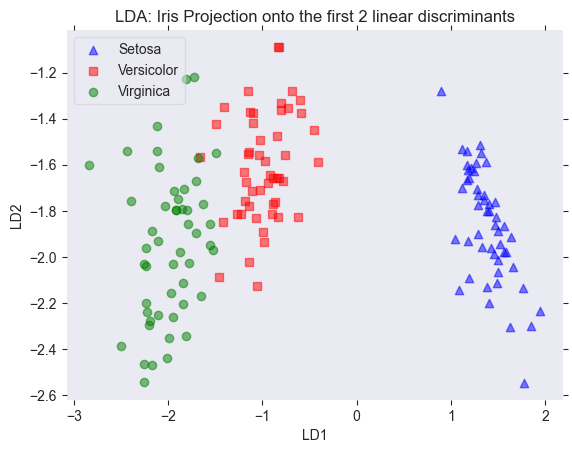

In [138]:
X_lda= X.dot (W)
#will throw an error in case the dot product has made an error assert
X_lda.shape == (150,2), "The matrix is not 150x2 dimensional"
def plot_step_lda():
    ax = plt.subplot(111)
    for label, marker, color in zip(range(0,3), ("^", "s", "o"), ("blue", "red", "green")):
        plt.scatter (x = X_lda[:,0].real [y== label],
            y= X_lda[:,1].real [y ==label],
            marker = marker,
            color =color,
            alpha = 0.5,
            label = label_dict[label])
    plt.xlabel("LD1")
    plt.ylabel("LD2")
    leg = plt.legend (loc= "upper left", fancybox = True)
    leg.get_frame().set_alpha (0.5)
    plt.title("LDA: Iris Projection onto the first 2 linear discriminants")
    plt.tick_params (axis="both", which = "both", bottom = "off", top = "off",
    labelbottom = "on", left = "off", right= "off", labelleft = "on")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible (False)
    ax.spines["bottom"].set_visible (False)
    ax.spines["left"].set_visible (False)
    plt.grid()
    plt.tight_layout
    plt.show()
plot_step_lda()

explained variance ratio (first two components): [0.9246 0.0531]


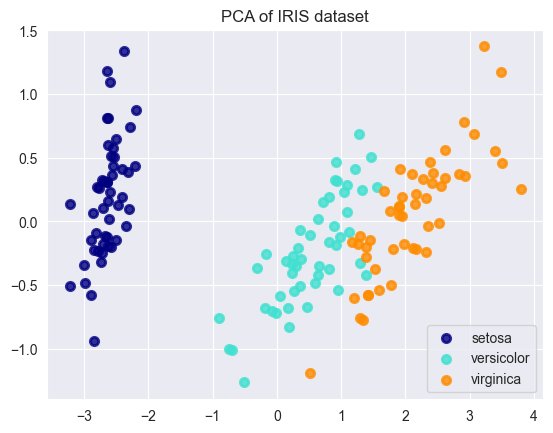

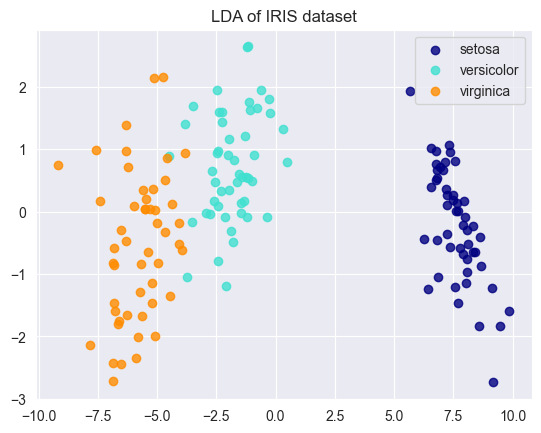

In [139]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)
# Percentage of variance explained for each components
print(
"explained variance ratio (first two components): %s"
% str(pca.explained_variance_ratio_)
)
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")
plt.show()

Yều cầu thực hành 

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Đọc dữ liệu Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

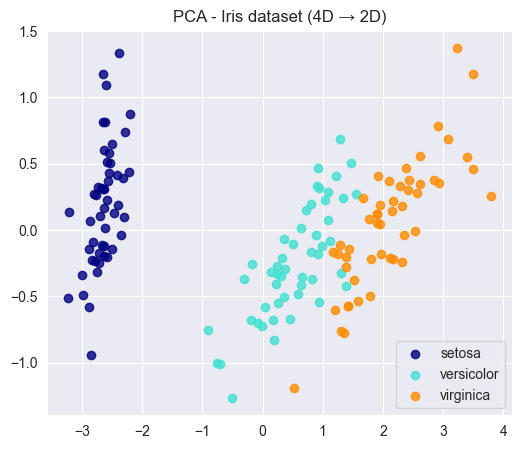

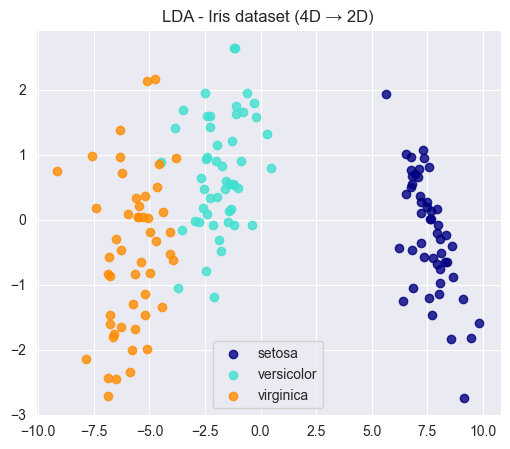

In [141]:
#  Giảm chiều bằng PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#  Giảm chiều bằng LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Vẽ dữ liệu sau PCA 
plt.figure(figsize=(6,5))
for color, i, target_name in zip(["navy", "turquoise", "darkorange"], [0,1,2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.8, label=target_name)
plt.title("PCA - Iris dataset (4D → 2D)")
plt.legend()
plt.show()

# Vẽ dữ liệu sau LDA 
plt.figure(figsize=(6,5))
for color, i, target_name in zip(["navy", "turquoise", "darkorange"], [0,1,2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color=color, alpha=0.8, label=target_name)
plt.title("LDA - Iris dataset (4D → 2D)")
plt.legend()
plt.show()

YÊU CẦU 2 – Phân loại bằng Logistic Regression

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#  Chia dữ liệu 4:1 theo từng lớp 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [143]:
# Trường hợp (a): Dữ liệu gốc
lr_orig = LogisticRegression(max_iter=1000)
lr_orig.fit(X_train, y_train)
y_pred_orig = lr_orig.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)
cm_orig = confusion_matrix(y_test, y_pred_orig)

print("=== Logistic Regression (Dữ liệu gốc) ===")
print("Độ chính xác:", round(acc_orig, 4))
print("Ma trận nhầm lẫn:\n", cm_orig)

=== Logistic Regression (Dữ liệu gốc) ===
Độ chính xác: 0.9667
Ma trận nhầm lẫn:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [144]:
#  Trường hợp (b.i): PCA
X_pca = pca.fit_transform(X)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)

lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = lr_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test_pca, y_pred_pca)
cm_pca = confusion_matrix(y_test_pca, y_pred_pca)

print("\n=== Logistic Regression (PCA - 2D) ===")
print("Độ chính xác:", round(acc_pca, 4))
print("Ma trận nhầm lẫn:\n", cm_pca)



=== Logistic Regression (PCA - 2D) ===
Độ chính xác: 0.9333
Ma trận nhầm lẫn:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [145]:
# Trường hợp (b.ii): LDA 
X_lda = lda.fit_transform(X, y)
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(
    X_lda, y, test_size=0.2, stratify=y, random_state=42
)

lr_lda = LogisticRegression(max_iter=1000)
lr_lda.fit(X_train_lda, y_train_lda)
y_pred_lda = lr_lda.predict(X_test_lda)
acc_lda = accuracy_score(y_test_lda, y_pred_lda)
cm_lda = confusion_matrix(y_test_lda, y_pred_lda)

print("\n=== Logistic Regression (LDA - 2D) ===")
print("Độ chính xác:", round(acc_lda, 4))
print("Ma trận nhầm lẫn:\n", cm_lda)


=== Logistic Regression (LDA - 2D) ===
Độ chính xác: 1.0
Ma trận nhầm lẫn:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


Ví dụ B.2 (Bài thực hành 2)

In [146]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

# Đọc dữ liệu ảnh chữ số viết tay MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

# Lấy 5000 ảnh ngẫu nhiên
np.random.seed(42)
indices = np.random.choice(X.shape[0], 5000, replace=False)
X = X.iloc[indices]
y = y.iloc[indices]

print("Kích thước dữ liệu:", X.shape)   # (5000, 784)


Kích thước dữ liệu: (5000, 784)


Giảm số chiều bằng PCA xuống 100 chiều

In [147]:
from sklearn.decomposition import PCA

# Giảm chiều còn 100
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

print("Kích thước sau PCA:", X_pca.shape)  # (5000, 100)


Kích thước sau PCA: (5000, 100)


Giảm chiều bằng LDA xuống 8 chiều

In [148]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=8)
X_lda = lda.fit_transform(X, y)

print("Kích thước sau LDA:", X_lda.shape)  # (5000, 8)


Kích thước sau LDA: (5000, 8)


Chia dữ liệu train : validation = 0.7 : 0.3

In [149]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)


In [150]:
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(
    X_pca, y, test_size=0.3, stratify=y, random_state=42)

X_train_lda, X_val_lda, y_train_lda, y_val_lda = train_test_split(
    X_lda, y, test_size=0.3, stratify=y, random_state=42)


Huấn luyện và đánh giá Logistic Regressio

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import time

def train_and_evaluate(X_train, X_val, y_train, y_val, desc):
    model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print(f"{desc} - Accuracy: {acc:.4f}, Time: {end-start:.2f}s")
    return acc, end-start

# a) Dữ liệu gốc
acc_raw, time_raw = train_and_evaluate(X_train, X_val, y_train, y_val, "Dữ liệu gốc (784 chiều)")

# b1) Dữ liệu PCA - 100 chiều
acc_pca, time_pca = train_and_evaluate(X_train_pca, X_val_pca, y_train_pca, y_val_pca, "Dữ liệu PCA (100 chiều)")

# b2) Dữ liệu LDA - 8 chiều
acc_lda, time_lda = train_and_evaluate(X_train_lda, X_val_lda, y_train_lda, y_val_lda, "Dữ liệu LDA (8 chiều)")


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Dữ liệu gốc (784 chiều) - Accuracy: 0.8760, Time: 1.68s


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Dữ liệu PCA (100 chiều) - Accuracy: 0.8387, Time: 1.24s
Dữ liệu LDA (8 chiều) - Accuracy: 0.9147, Time: 0.03s


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Ví dụ B.4. (Bài tập thực hành 3):

In [108]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

data = load_wine()
X = data.data
y = data.target
print("Kích thước dữ liệu ban đầu:", X.shape)


Kích thước dữ liệu ban đầu: (178, 13)


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Giảm chiều dữ liệu

In [110]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [111]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


Huấn luyện mô hình

Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

def train_and_eval(model, X_tr, X_te, y_tr, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    cm = confusion_matrix(y_te, y_pred)
    return acc, cm

lr = LogisticRegression(max_iter=1000)

acc_lr_orig, cm_lr_orig = train_and_eval(lr, X_train, X_test, y_train, y_test)
acc_lr_pca, cm_lr_pca = train_and_eval(lr, X_train_pca, X_test_pca, y_train, y_test)
acc_lr_lda, cm_lr_lda = train_and_eval(lr, X_train_lda, X_test_lda, y_train, y_test)


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes

In [113]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

acc_nb_orig, cm_nb_orig = train_and_eval(nb, X_train, X_test, y_train, y_test)
acc_nb_pca, cm_nb_pca = train_and_eval(nb, X_train_pca, X_test_pca, y_train, y_test)
acc_nb_lda, cm_nb_lda = train_and_eval(nb, X_train_lda, X_test_lda, y_train, y_test)


Bài tập tự thực hành

In [114]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

path = '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab7/face_data 2/'
ids = range(1, 16)  
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight', 'sad',
          'sleepy', 'surprised', 'wink']
prefix = 'subject'
surfix = '.png'  

fn = prefix + '01.' + states[0] + surfix
im = cv2.imread(path + fn, 0)
h, w = im.shape
D = h * w
N = len(states) * 15
print(N, D, h, w)

X = np.zeros((D, N))
count = 0

for person_id in range(1, 16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
        if tmp is None:
            print(f" Không tìm thấy ảnh: {fn}")
            continue
        X[:, count] = tmp.reshape(D)
        count += 1

print(f" Đọc được {count} ảnh thành công trong tổng {N}")


165 77760 243 320
 Đọc được 165 ảnh thành công trong tổng 165


Đọc ảnh (sửa lỗi) — tạo ma trận X (D x N) và nhãn y

In [115]:
import numpy as np
import cv2
import os

# cấu hình 
path = '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab7/face_data 2/'  
ids = range(1, 16)  # 15 người (1..15)
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight', 'sad',
          'sleepy', 'surprised', 'wink']
prefix = 'subject'
surfix = '.png'

#  đọc 1 ảnh để biết kích thước 
fn0 = path + prefix + '01.' + states[0] + surfix
im0 = cv2.imread(fn0, cv2.IMREAD_GRAYSCALE)
if im0 is None:
    raise FileNotFoundError(f"Không tìm thấy {fn0}. Kiểm tra đường dẫn và tên file.")
h, w = im0.shape
D = h * w
N_expected = len(states) * len(ids)
print("H, W, D, N_expected:", h, w, D, N_expected)

# ==== khởi tạo ====
X = np.zeros((D, N_expected), dtype=np.float32)
y = np.zeros(N_expected, dtype=int)  
count = 0

# thu thập ảnh
for person_id in range(1, 16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print("️ Không tìm thấy:", fn)
            continue
        # nếu kích thước khác, resize về kích thước chuẩn
        if img.shape != (h, w):
            img = cv2.resize(img, (w, h))
        X[:, count] = img.reshape(-1)
        y[count] = person_id  # gán label là id người
        count += 1

# Nếu có ảnh bị thiếu, cắt X,y cho vừa
if count != N_expected:
    X = X[:, :count]
    y = y[:count]
    print(f"Đã đọc được {count} ảnh (trên {N_expected}).")


X = X / 255.0
print("Ma trận X:", X.shape, "y:", y.shape)


H, W, D, N_expected: 243 320 77760 165
Ma trận X: (77760, 165) y: (165,)


Giảm chiều xuống 135 bằng PCA

In [116]:
from sklearn.decomposition import PCA
X_samples = X.T 
pca = PCA(n_components=135, random_state=42)
X_pca = pca.fit_transform(X_samples)
print("X_pca shape:", X_pca.shape) 


X_pca shape: (165, 135)


(b) Huấn luyện Multinomial Logistic Regression & Naive Bayes

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

RSEED = 42
test_size = 0.3

# Dữ liệu gốc (ảnh phẳng)
X_orig = X_samples.copy() 

# Dữ liệu PCA (135)
X_reduced = X_pca  

# Chia train/test (sử dụng cùng chỉ số split để dễ so sánh)
X_tr_orig, X_te_orig, y_tr, y_te = train_test_split(
    X_orig, y, test_size=test_size, random_state=RSEED, stratify=y)

X_tr_pca, X_te_pca, _, _ = train_test_split(
    X_reduced, y, test_size=test_size, random_state=RSEED, stratify=y)

# Multinomial Logistic Regression (dữ liệu gốc) 
clf_lr_orig = LogisticRegression(max_iter=2000, solver='lbfgs', multi_class='multinomial', random_state=RSEED)
t0 = time.time()
clf_lr_orig.fit(X_tr_orig, y_tr)
t1 = time.time()
y_pred_lr_orig = clf_lr_orig.predict(X_te_orig)
acc_lr_orig = accuracy_score(y_te, y_pred_lr_orig)
time_lr_orig = t1 - t0

# Multinomial Logistic Regression (PCA 135) 
clf_lr_pca = LogisticRegression(max_iter=2000, solver='lbfgs', multi_class='multinomial', random_state=RSEED)
t0 = time.time()
clf_lr_pca.fit(X_tr_pca, y_tr)
t1 = time.time()
y_pred_lr_pca = clf_lr_pca.predict(X_te_pca)
acc_lr_pca = accuracy_score(y_te, y_pred_lr_pca)
time_lr_pca = t1 - t0

# Naive Bayes (Gaussian) trên dữ liệu gốc 
clf_nb_orig = GaussianNB()
t0 = time.time()
clf_nb_orig.fit(X_tr_orig, y_tr)
t1 = time.time()
y_pred_nb_orig = clf_nb_orig.predict(X_te_orig)
acc_nb_orig = accuracy_score(y_te, y_pred_nb_orig)
time_nb_orig = t1 - t0

# Naive Bayes (Gaussian) trên PCA 135 
clf_nb_pca = GaussianNB()
t0 = time.time()
clf_nb_pca.fit(X_tr_pca, y_tr)
t1 = time.time()
y_pred_nb_pca = clf_nb_pca.predict(X_te_pca)
acc_nb_pca = accuracy_score(y_te, y_pred_nb_pca)
time_nb_pca = t1 - t0
print("=== KẾT QUẢ (train:test = 0.7:0.3) ===")
print(f"LogReg - orig: acc={acc_lr_orig:.4f}, time={time_lr_orig:.3f}s")
print(f"LogReg - PCA135: acc={acc_lr_pca:.4f}, time={time_lr_pca:.3f}s")
print(f"NaiveBayes - orig: acc={acc_nb_orig:.4f}, time={time_nb_orig:.3f}s")
print(f"NaiveBayes - PCA135: acc={acc_nb_pca:.4f}, time={time_nb_pca:.3f}s")

print("\nConfusion matrix - Logistic (orig):\n", confusion_matrix(y_te, y_pred_lr_orig))
print("\nConfusion matrix - Logistic (PCA135):\n", confusion_matrix(y_te, y_pred_lr_pca))


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== KẾT QUẢ (train:test = 0.7:0.3) ===
LogReg - orig: acc=0.8400, time=22.810s
LogReg - PCA135: acc=0.8800, time=0.030s
NaiveBayes - orig: acc=0.3400, time=0.093s
NaiveBayes - PCA135: acc=0.6400, time=0.001s

Confusion matrix - Logistic (orig):
 [[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 0 0 1]]

Confusion matrix - Logistic (PCA135):
 [[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 

(c) Dùng toàn bộ 165 ảnh làm train, rồi test 5 ảnh mới (resize H=320 W=243 và dịch chân dung sang phải)

In [118]:
# Huấn luyện trên toàn bộ 165 ảnh 
clf_full_lr = LogisticRegression(max_iter=2000, solver='lbfgs', multi_class='multinomial', random_state=RSEED)
clf_full_lr.fit(X_samples, y) 

clf_full_nb = GaussianNB()
clf_full_nb.fit(X_samples, y)

# Hàm tiền xử lý ảnh mới
def preprocess_new_image(fn, H=320, W=243, shift_ratio=0.15):

    img = cv2.imread(fn)
    if img is None:
        raise FileNotFoundError(f"Không tìm thấy file {fn}")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
    resized = cv2.resize(gray, (W, H))
   
    shift_pixels = int(W * shift_ratio)
    canvas = np.zeros_like(resized)  
    
    canvas[:, shift_pixels:] = resized[:, : W - shift_pixels]
    return (canvas.astype(np.float32) / 255.0).reshape(-1)  

# === Dự đoán 5 ảnh mới ===
new_files = [
    '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab7/face_data 2/subject01.centerlight.png',
    '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab7/face_data 2/subject01.glasses.png',
    '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab7/face_data 2/subject01.happy.png',
    '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab7/face_data 2/subject01.leftlight.png',
    '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab7/face_data 2/subject01.noglasses.png'
]

processed = []
for fn in new_files:
    try:
        v = preprocess_new_image(fn, H=h, W=w, shift_ratio=0.15)  
        processed.append(v)
    except FileNotFoundError as e:
        print(e)
        processed.append(None)
processed = [p for p in processed if p is not None]
if len(processed) == 0:
    raise RuntimeError("Không có file mới hợp lệ để test.")

X_new = np.vstack(processed)  
y_pred_new_lr = clf_full_lr.predict(X_new)
y_pred_new_nb = clf_full_nb.predict(X_new)

print("Dự đoán (Logistic full train):", y_pred_new_lr)
print("Dự đoán (NaiveBayes full train):", y_pred_new_nb)

for i, pred in enumerate(y_pred_new_lr):
    print(f"Ảnh mới {i+1} dự đoán thuộc person_id = {pred}")


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Dự đoán (Logistic full train): [1 1 1 1 1]
Dự đoán (NaiveBayes full train): [1 1 1 1 5]
Ảnh mới 1 dự đoán thuộc person_id = 1
Ảnh mới 2 dự đoán thuộc person_id = 1
Ảnh mới 3 dự đoán thuộc person_id = 1
Ảnh mới 4 dự đoán thuộc person_id = 1
Ảnh mới 5 dự đoán thuộc person_id = 1
